In [199]:
import pandas as pd
import numpy as np

data = pd.read_csv("expectativa.csv")

# Medidas de Associação

### Covariância

In [4]:
data.cov()

year           pop       lifeExp     gdpPercap
year       2.980916e+02  1.508584e+08  9.714919e+01  3.868776e+04
pop        1.508584e+08  1.126950e+16  8.907024e+07 -2.678859e+10
lifeExp    9.714919e+01  8.907024e+07  1.668517e+02  7.432320e+04
gdpPercap  3.868776e+04 -2.678859e+10  7.432320e+04  9.716941e+07

In [5]:
data.gdpPercap.cov(data.lifeExp)

74323.19574798805

In [8]:
np.cov(data.gdpPercap, data.lifeExp)

array([[9.71694101e+07, 7.43231957e+04],
       [7.43231957e+04, 1.66851664e+02]])

### Correlação

Peason

In [9]:
data.corr()

year       pop   lifeExp  gdpPercap
year       1.000000  0.082308  0.435611   0.227318
pop        0.082308  1.000000  0.064955  -0.025600
lifeExp    0.435611  0.064955  1.000000   0.583706
gdpPercap  0.227318 -0.025600  0.583706   1.000000

In [10]:
data.gdpPercap.corr(data.lifeExp)

0.5837062198659948

In [11]:
np.corrcoef(data.gdpPercap, data.lifeExp)

array([[1.        , 0.58370622],
       [0.58370622, 1.        ]])

In [12]:
np.correlate(data.gdpPercap, data.lifeExp)

array([8.57805719e+08])

In [13]:
from scipy import stats
gdpPercap = data.gdpPercap.values
life_exp = data.lifeExp.values

print(stats.pearsonr(gdpPercap,life_exp))

(0.5837062198659947, 3.5657242410520643e-156)
SpearmanrResult(correlation=0.8264711811970715, pvalue=0.0)
KendalltauResult(correlation=0.6369106595644447, pvalue=0.0)


Spearman

In [14]:
print(stats.spearmanr(gdpPercap,life_exp))

SpearmanrResult(correlation=0.8264711811970715, pvalue=0.0)


Kendall Tau

In [16]:
print(stats.kendalltau(gdpPercap,life_exp))

KendalltauResult(correlation=0.6369106595644447, pvalue=0.0)


# Análise Multivariada

![analise_exploratoria_de_dados.png](analise_exploratoria_de_dados.png)

### Matriz de Correlação

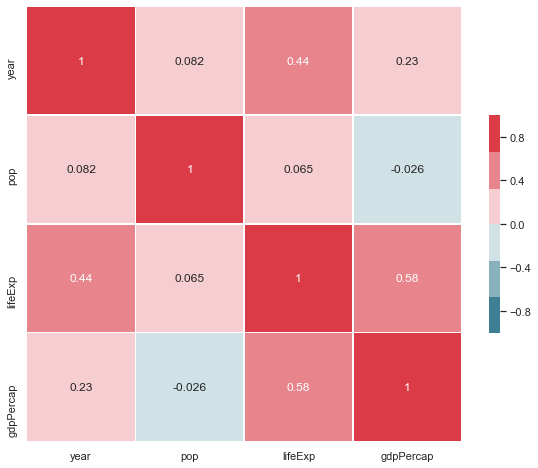

In [2]:
# bug no numpy >= 1.18.0 - pip install --upgrade numpy==1.17.5
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()

cmap = sns.diverging_palette(220, 10)

sns.heatmap(corr, annot=True, cmap=cmap, vmax=1, vmin=-1, center=0, square=True,
            linewidth=.5,cbar_kws={"shrink":.5})


Simplificando visualização da Matriz de correlação

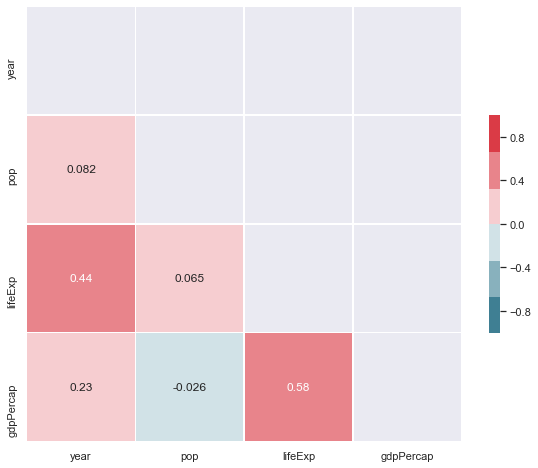

In [3]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

cmap = sns.diverging_palette(220, 10)

sns.heatmap(corr, mask=mask, annot=True, cmap=cmap,
            vmax=1, vmin=-1, center=0, square=True, 
            linewidth=.5,cbar_kws={"shrink":.5})

### Scatterplot

Text(0, 0.5, 'Frequência')

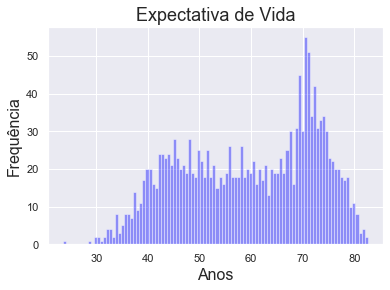

In [4]:
hplot = sns.distplot(data['lifeExp'], kde=False, color='blue', bins=100)
plt.title('Expectativa de Vida', fontsize=18)
plt.xlabel('Anos', fontsize=16)
plt.ylabel('Frequência', fontsize=16)

Text(0, 0.5, 'Valores PIB')

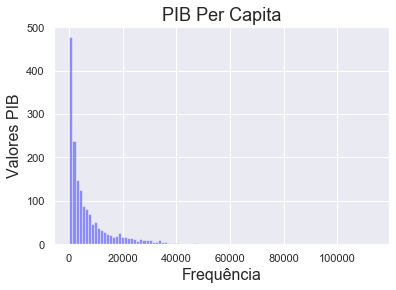

In [5]:
hplot = sns.distplot(data['gdpPercap'], kde=False, color='blue', bins=100)
plt.title('PIB Per Capita', fontsize=18)
plt.xlabel('Frequência', fontsize=16)
plt.ylabel('Valores PIB', fontsize=16)

Text(0.5, 0, 'Expectativa de Vida')

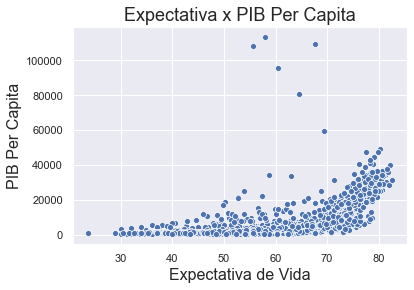

In [6]:
sns.scatterplot('lifeExp','gdpPercap',data=data)
plt.title('Expectativa x PIB Per Capita', fontsize=18)
plt.ylabel('PIB Per Capita', fontsize=16)
plt.xlabel('Expectativa de Vida', fontsize=16)

Escala Logarítimica

Text(0.5, 0, 'Expectativa de Vida')

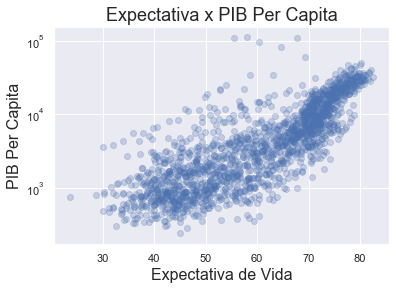

In [7]:
splot = sns.regplot(x="lifeExp", y="gdpPercap", 
                    data=data,
                    scatter_kws={'alpha':0.25},
                    fit_reg=False)

splot.set(yscale="log")

plt.title('Expectativa x PIB Per Capita', fontsize=18)
plt.ylabel('PIB Per Capita', fontsize=16)
plt.xlabel('Expectativa de Vida', fontsize=16)

Agrupando os dados por Continente

Text(0.5, 0, 'Expectativa de Vida')

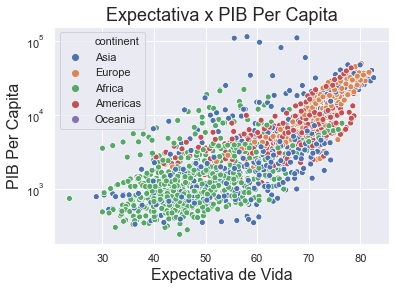

In [8]:
splot = sns.scatterplot(x="lifeExp", y="gdpPercap", 
                    data=data, hue="continent")
splot.set(yscale="log")
plt.title('Expectativa x PIB Per Capita', fontsize=18)
plt.ylabel('PIB Per Capita', fontsize=16)
plt.xlabel('Expectativa de Vida', fontsize=16)

Onde estava a Oceania?

(200, 150000)

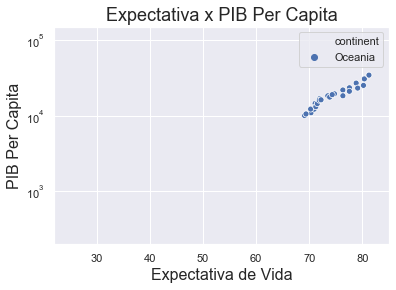

In [9]:
df=data[data.continent.isin(['Oceania'])]
splot = sns.scatterplot(x="lifeExp", y="gdpPercap", 
                    data=df, hue="continent")
splot.set(yscale="log")
plt.title('Expectativa x PIB Per Capita', fontsize=18)
plt.ylabel('PIB Per Capita', fontsize=16)
plt.xlabel('Expectativa de Vida', fontsize=16)
splot.set_xlim(22,85)
splot.set_ylim(200,150000)

### Pairplot

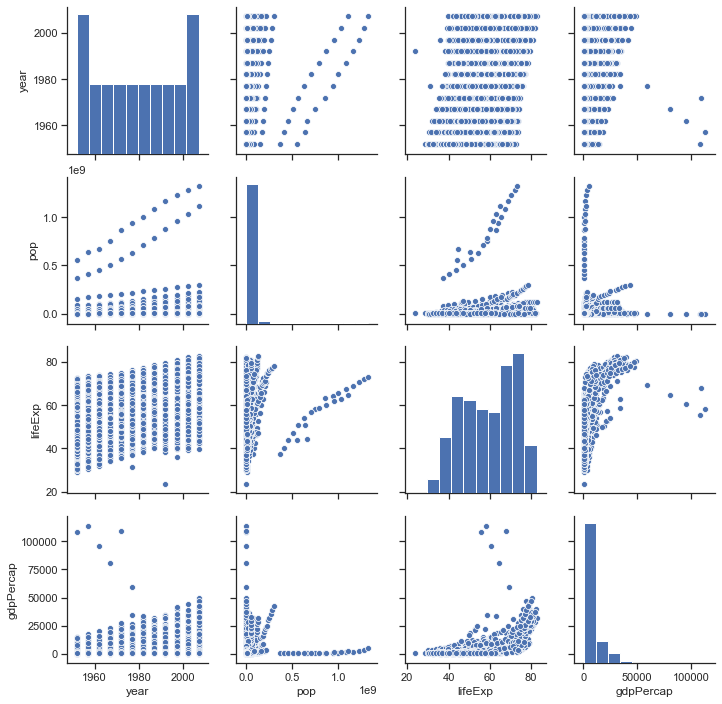

In [11]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data)

Exibindo a distribuição das variáveis

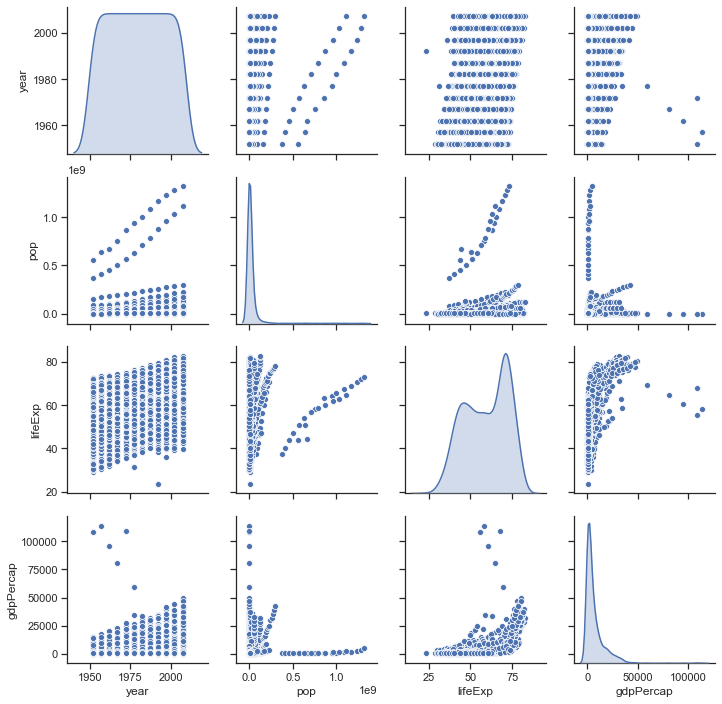

In [12]:
sns.pairplot(data, diag_kind="kde")

Exibindo as regressões das correlações

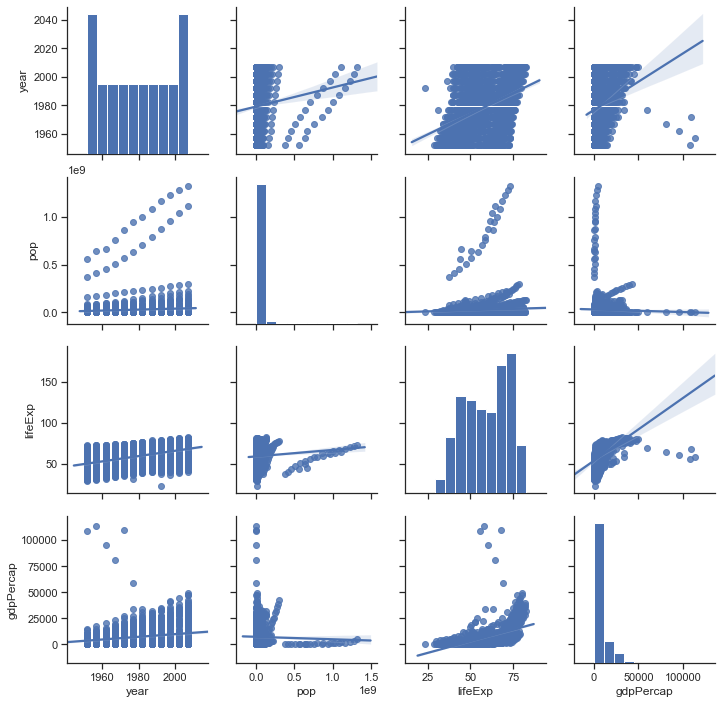

In [13]:
sns.pairplot(data, kind="reg")

### Boxplot

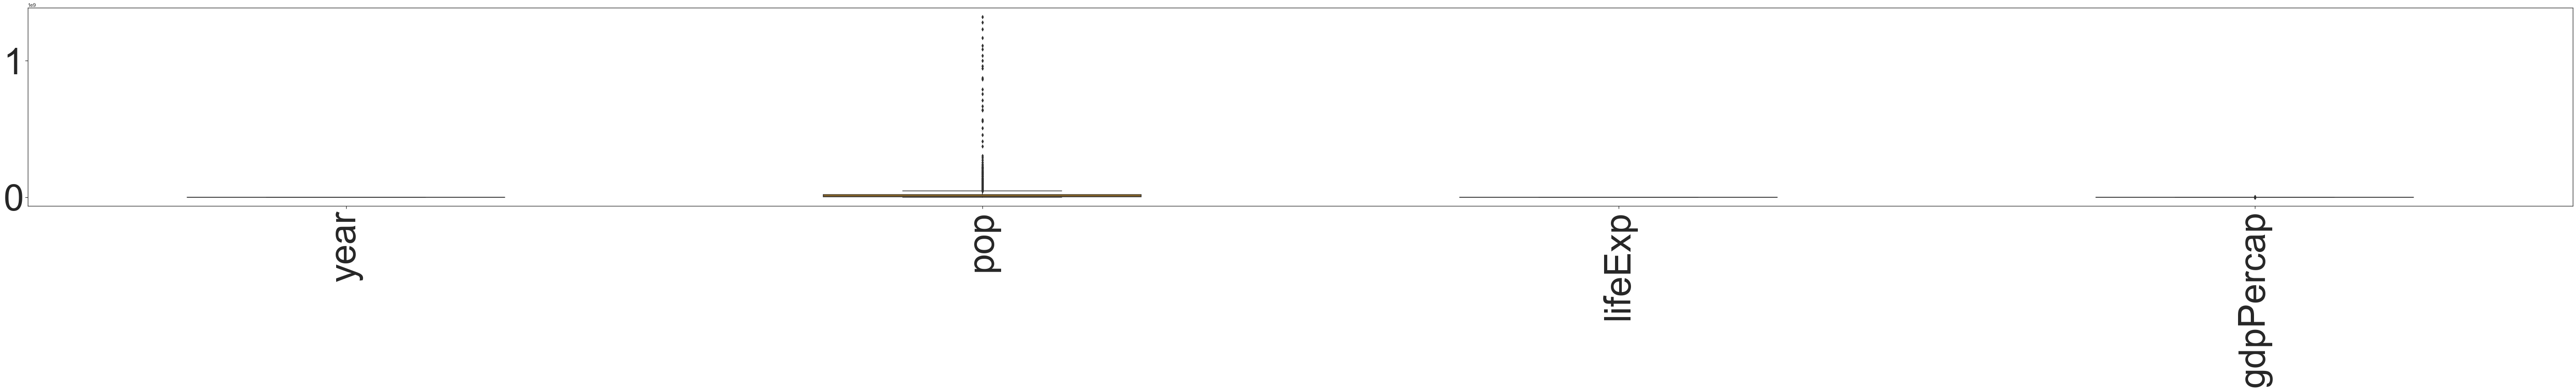

In [14]:
import seaborn as sns
f, ax = plt.subplots(figsize=(100, 8))
bp = sns.boxplot(data=data, width=0.5, palette="colorblind")
plt.setp(bp.get_xticklabels(), rotation=90)
bp.tick_params(labelsize=80)

### Ternário

In [20]:
#!pip install python-ternary
import ternary

def plot_ternario(title, labels,points,cor, endmembers):
    figure, tax = ternary.figure(scale=100)
    figure.set_size_inches(10, 10)
    tax.set_title(title, fontsize=15)
    tax.boundary(linewidth=2.0)
    tax.gridlines(multiple=10, color="blue")

    cb_kwargs = {"shrink" : 0.6,
                 "orientation" : "horizontal",
                 "fraction" : 0.1,
                 "pad" : 0.05,
                 "aspect" : 30}
    i = 0
    for label_ in labels:
        points_ = points[i]
        cor_    = cor[i]  
        i = i+1
        tax.scatter(points_,marker='s',edgecolor='k',s=40,linewidths=0.5, c=cor_,
                label=label_,vmin=0,vmax=100, cb_kwargs=cb_kwargs,zorder=3)

    tax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    tax.ticks(axis='lbr', linewidth=1, multiple=5)

    fontsize = 15
    tax.bottom_axis_label(endmembers[0], fontsize=fontsize)
    tax.right_axis_label(endmembers[1], fontsize=fontsize)
    tax.left_axis_label(endmembers[2], fontsize=fontsize)

    tax.get_axes().axis('off')
    tax.clear_matplotlib_ticks()

    tax.show()

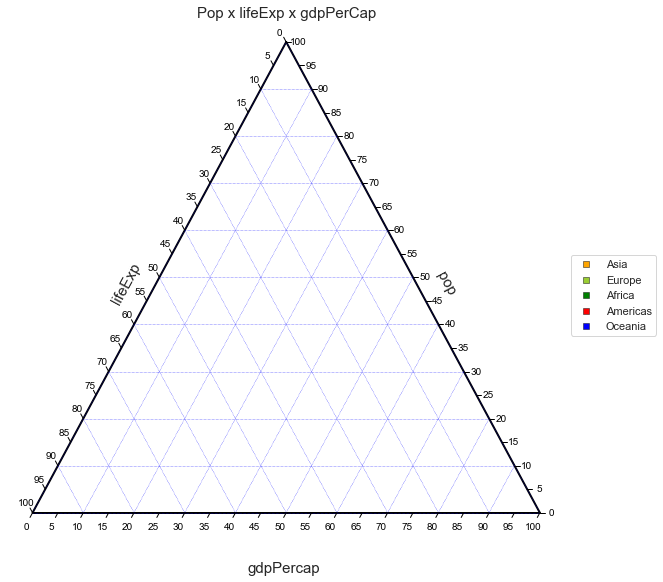

In [150]:
df = data[data.year == 2007]

label_pre = data["continent"].unique().tolist()

points = []
for label in label_pre:
    mask = df['continent'] == label
    pos = np.flatnonzero(mask)
    dataf = df.iloc[pos]
    endmembers = ['gdpPercap','pop','lifeExp']
    points_ = dataf[endmembers].values
    points.append(points_)

colors = ['orange', 'yellowgreen', 'green','red', 'blue']
plot_ternario("Pop x lifeExp x gdpPerCap",label_pre,points,colors,endmembers)

# Transformações de Dados

### Alisamento

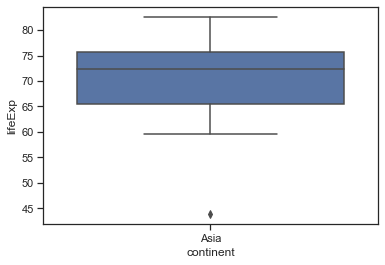

In [39]:
df =  data[data['year']==2007]
df = df[df.continent == 'Asia']

sns.boxplot(y='lifeExp', x='continent', data=df)

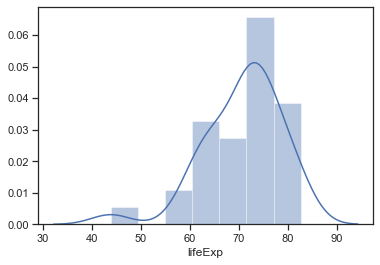

In [40]:
sns.distplot(df['lifeExp'])

### Intervalo-Interquartil

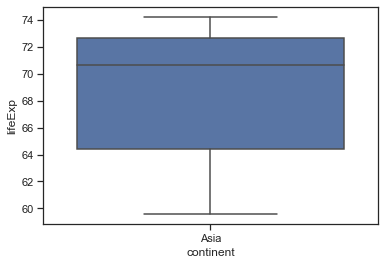

In [41]:
from numpy import percentile

quartis = percentile(df['lifeExp'], [25, 75])
d = quartis[1] - quartis[0]
media = data['lifeExp'].mean()
LS = media + 1.5 * d
LI = media - 1.5 * d

df2 = df[~((df['lifeExp'] < LI) | (df['lifeExp'] > LS))]
    
sns.boxplot(y='lifeExp', x='continent', data=df2)

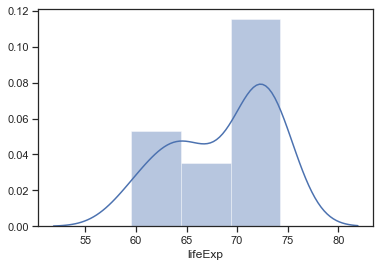

In [42]:
sns.distplot(df2['lifeExp'])

### Z-Score

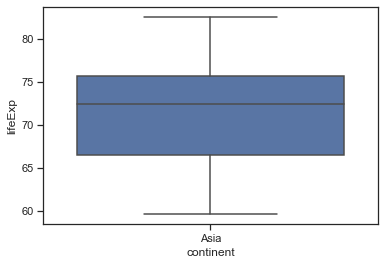

In [43]:
media = df['lifeExp'].mean()
S = df['lifeExp'].std()

Z = 2    #Z = (x — media) / S
LS = media + Z * S
LI = media - Z * S

df2 = df[~((df['lifeExp'] < LI) | (df['lifeExp'] > LS))]
    
sns.boxplot(y='lifeExp', x='continent', data=df2)

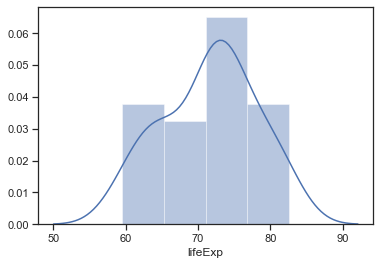

In [44]:
sns.distplot(df2['lifeExp'])

### Padronização

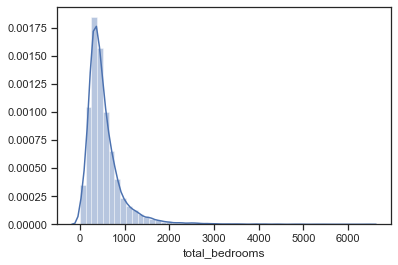

In [45]:
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv("california_housing_train.csv")
sns.distplot(df['total_bedrooms'])

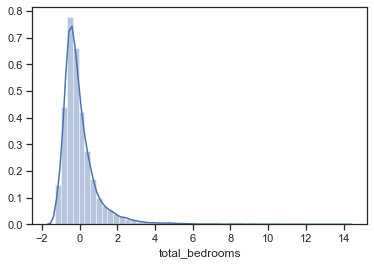

In [46]:
from sklearn import preprocessing

# x_scaled = (x — media) / S
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
sns.distplot(scaled_df['total_bedrooms'])

### Escalonamento Linear

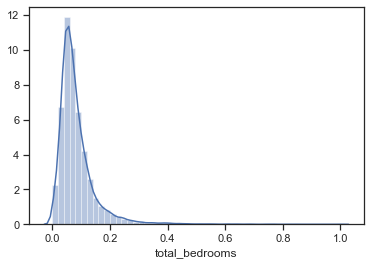

In [47]:
from sklearn import preprocessing

# x_scaled = (x-min(x)) / (max(x)–min(x))
scaler = preprocessing.MinMaxScaler()

scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
sns.distplot(scaled_df['total_bedrooms'])

### Escalonamento Máximo

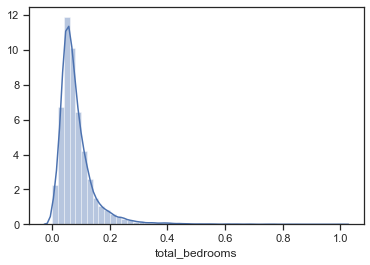

In [48]:
from sklearn import preprocessing

# x_scaled = x / max(abs(x))
scaler = preprocessing.MaxAbsScaler()

scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
sns.distplot(scaled_df['total_bedrooms'])

### Escalonamento Robusto

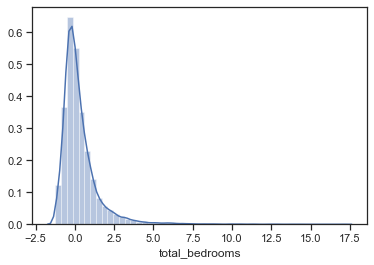

In [49]:
from sklearn import preprocessing

#(0.25,0.75) – 1o e 3o Quartis
scaler = preprocessing.RobustScaler() 

scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
sns.distplot(scaled_df['total_bedrooms'])

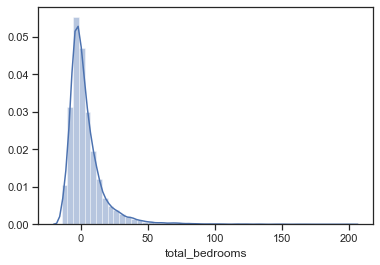

In [50]:
#(0.1,0.9) - Percentis
scaler = preprocessing.RobustScaler(
		quantile_range = (0.1,0.9))
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
sns.distplot(scaled_df['total_bedrooms'])

### Normalização Max

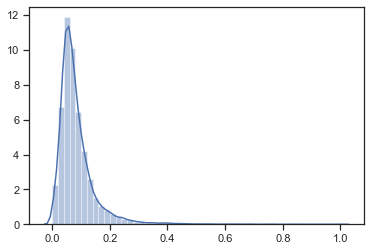

In [51]:
from sklearn import preprocessing

# x_normalized = x / max(x)
normalized_X = preprocessing.normalize([np.array(df['total_bedrooms'])], norm='max')
sns.distplot(normalized_X)

### Normalização L1 (Manhattan)

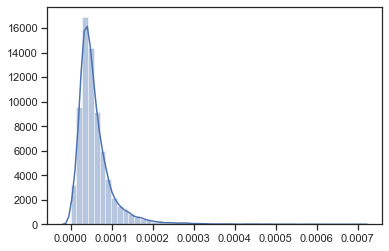

In [52]:
from sklearn import preprocessing

# x_normalized = x / sum(abs(i) for i in X)
normalized_X = preprocessing.normalize([np.array(df['total_bedrooms'])], norm='l1')
sns.distplot(normalized_X)

### Normalização L2

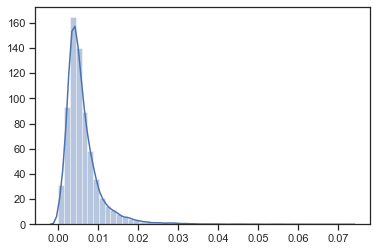

In [53]:
from sklearn import preprocessing

# x_normalized = x / sqrt(sum((i**2) for i in X))
normalized_X = preprocessing.normalize([np.array(df['total_bedrooms'])], norm='l2')
sns.distplot(normalized_X)

### Assimetria positiva

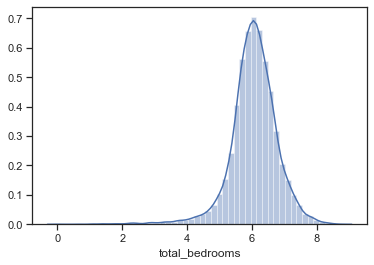

In [55]:
#C = Constante para converter o mínimo para 1
C = -df.total_bedrooms.min() + 1
total_bedrooms = np.log(df.total_bedrooms + C)
sns.distplot(total_bedrooms)

### Assimetria negativa

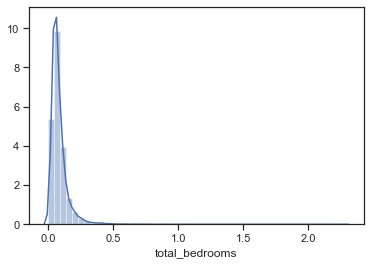

In [57]:
#K = constant para converter o máximo
#K = df.total_bedrooms.max() + 1
#total_bedrooms = np.log(K - df.total_bedrooms)

K = total_bedrooms.max() + 1
total_bedrooms = np.log(K - total_bedrooms)

sns.distplot(total_bedrooms)

### Transformação quadrática

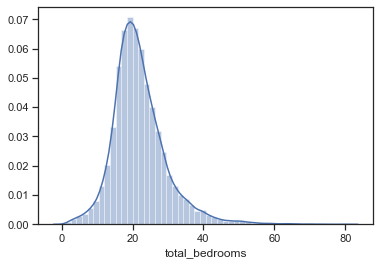

In [58]:
total_bedrooms = df.total_bedrooms **(1/2)
total_bedrooms = pd.DataFrame(total_bedrooms, columns=['total_bedrooms'])

sns.distplot(total_bedrooms['total_bedrooms'])

Escalando a transformação:

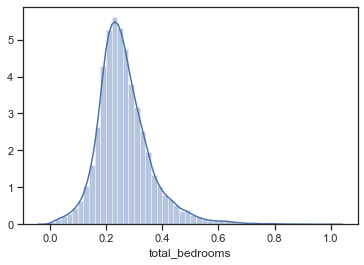

In [59]:
# x_scaled = (x-min(x)) / (max(x)–min(x))
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(total_bedrooms)
scaled_df = pd.DataFrame(scaled_df, columns=['total_bedrooms'])
sns.distplot(scaled_df['total_bedrooms'])

### Transformação Cúbica

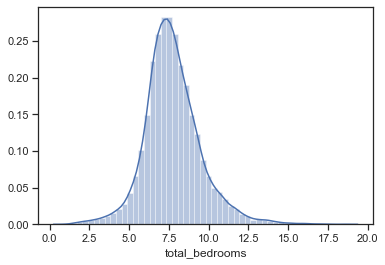

In [60]:
total_bedrooms = df.total_bedrooms **(1/3)
total_bedrooms = pd.DataFrame(total_bedrooms, columns=['total_bedrooms'])

sns.distplot(total_bedrooms['total_bedrooms'])

Escalando a transformação:

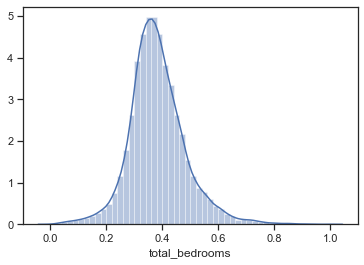

In [61]:
# x_scaled = (x-min(x)) / (max(x)–min(x))
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(total_bedrooms)
scaled_df = pd.DataFrame(scaled_df, columns=['total_bedrooms'])
sns.distplot(scaled_df['total_bedrooms'])

### Transformação Log Max Root

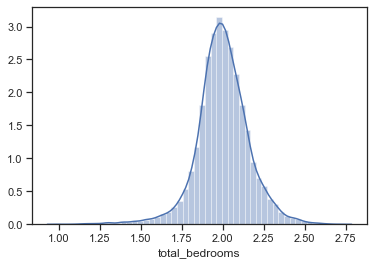

In [62]:
log_max = np.log(df.total_bedrooms.max())
total_bedrooms = df.total_bedrooms ** (1/log_max)
total_bedrooms = pd.DataFrame(total_bedrooms, columns=['total_bedrooms'])

sns.distplot(total_bedrooms['total_bedrooms'])

Escalando a transformação:

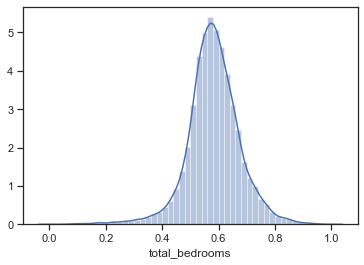

In [63]:
# x_scaled = (x-min(x)) / (max(x)–min(x))
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(total_bedrooms)
scaled_df = pd.DataFrame(scaled_df, columns=['total_bedrooms'])
sns.distplot(scaled_df['total_bedrooms'])

### Transformação logarítmica

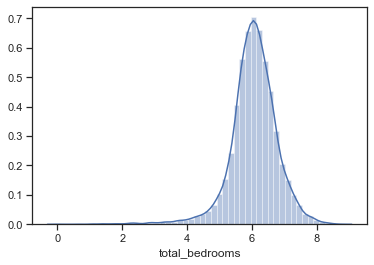

In [64]:
total_bedrooms = np.log(df.total_bedrooms)
total_bedrooms = pd.DataFrame(total_bedrooms, columns=['total_bedrooms'])

sns.distplot(total_bedrooms['total_bedrooms'])

Ao final podemos escalar o resultado
* Isto facilita a comparação entre as distribuições

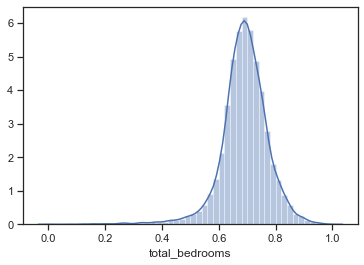

In [65]:
# x_scaled = (x-min(x)) / (max(x)–min(x))
scaler = preprocessing.MinMaxScaler()

scaled_df = scaler.fit_transform(total_bedrooms)
scaled_df = pd.DataFrame(scaled_df, columns=['total_bedrooms'])
sns.distplot(scaled_df['total_bedrooms'])

### Transformação Log + 1

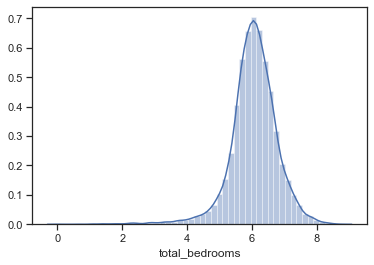

In [69]:
C = -df.total_bedrooms.min() + 1

total_bedrooms = np.log(df.total_bedrooms + C)
total_bedrooms = pd.DataFrame(total_bedrooms, columns=['total_bedrooms'])
sns.distplot(total_bedrooms['total_bedrooms'])

Escalando a transformação:

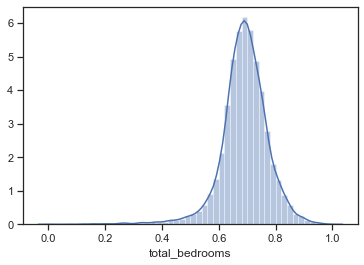

In [68]:
# x_scaled = (x-min(x)) / (max(x)–min(x))
scaler = preprocessing.MinMaxScaler()

scaled_df = scaler.fit_transform(total_bedrooms)
scaled_df = pd.DataFrame(scaled_df, columns=['total_bedrooms'])
sns.distplot(scaled_df['total_bedrooms'])

Para distribuições com assimetria negativa usamos 1-Log ou K-Log:

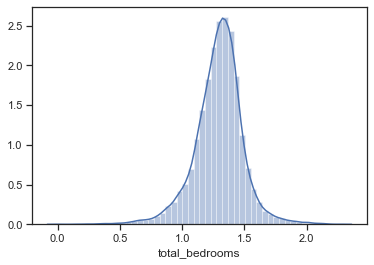

In [72]:
# Transformando a distribuição em uma distribuição com assimetria negativa
C = -df.total_bedrooms.min() + 1
total_bedrooms = np.log(df.total_bedrooms + C)

# Aplicando o Log + 1 em uma distribuição com assimetria negativa
K = total_bedrooms.max() +1

total_bedrooms = np.log(K - total_bedrooms)
total_bedrooms = pd.DataFrame(total_bedrooms, columns=['total_bedrooms'])
sns.distplot(total_bedrooms['total_bedrooms'])

Escalando a transformação:

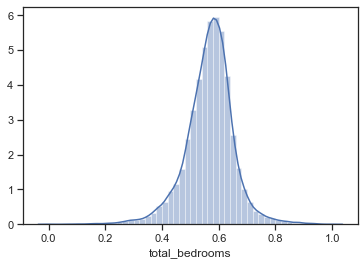

In [73]:
# x_scaled = (x-min(x)) / (max(x)–min(x))
scaler = preprocessing.MinMaxScaler()

scaled_df = scaler.fit_transform(total_bedrooms)
scaled_df = pd.DataFrame(scaled_df, columns=['total_bedrooms'])
sns.distplot(scaled_df['total_bedrooms'])

### Transformação Linearização do Percentil

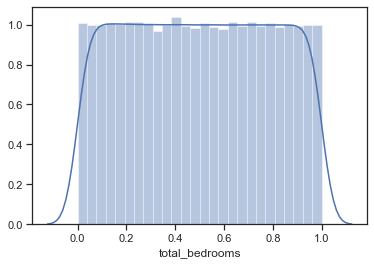

In [74]:
size = len(df.total_bedrooms)-1
total_bedrooms = df.total_bedrooms.rank(method='min').apply(lambda x: (x-1)/size)
total_bedrooms = pd.DataFrame(total_bedrooms, columns=['total_bedrooms'])

sns.distplot(total_bedrooms['total_bedrooms'])

### Transformação Linearização do Percentil

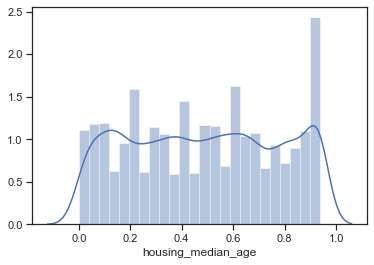

In [75]:
size = len(df.housing_median_age)-1
housing_median_age = df.housing_median_age.rank(method='min').apply(lambda x: (x-1)/size)
housing_median_age = pd.DataFrame(housing_median_age, columns=['housing_median_age'])

sns.distplot(housing_median_age['housing_median_age'])

# Transformação numérico em categórico

### Mapeamento direto

In [76]:
from sklearn.preprocessing import OrdinalEncoder

labels = [["F","M"]]
encoder = OrdinalEncoder(categories=labels)
encoder.fit(np.array(labels).reshape(-1, 1).tolist())
encoder.inverse_transform([[1],[0],[0],[1]])

array([['M'],
       ['F'],
       ['F'],
       ['M']], dtype=object)

In [77]:
labels = [["ruim", "mediano", "bom"]]
encoder = OrdinalEncoder(categories=labels)
encoder.fit(np.array(labels).reshape(-1, 1).tolist())
encoder.inverse_transform([[2],[0],[0],[1]])

array([['bom'],
       ['ruim'],
       ['ruim'],
       ['mediano']], dtype=object)

### Mapeamento em intervalos (discretização)

In [79]:
df_idade = pd.DataFrame({'idade': np.random.randint(21, 51, 8)})
df_idade['idade_faixas'] = pd.cut(x=df_idade['idade'], bins=[19, 29, 39, 49, 59])
df_idade['idade_decada'] = pd.cut(x=df_idade['idade'], bins=[19, 29, 39, 49, 59], labels=['20s', '30s', '40s', '50s'])
df_idade

idade idade_faixas idade_decada
0     38     (29, 39]          30s
1     43     (39, 49]          40s
2     29     (19, 29]          20s
3     47     (39, 49]          40s
4     31     (29, 39]          30s
5     37     (29, 39]          30s
6     39     (29, 39]          30s
7     26     (19, 29]          20s

# Transformação categórico em numérico

### Mapeamento direto

In [81]:
df_estado_civil = pd.DataFrame({'Estado Civil': ["Casado","Solteiro","Solteiro", "Casado", "Viúvo", "Divorciado","Outro"]})

encoder = OrdinalEncoder()

df_estado_civil['Mapeamento'] = encoder.fit_transform(df_estado_civil["Estado Civil"].values.reshape(-1, 1))
df_estado_civil

Estado Civil  Mapeamento
0       Casado         0.0
1     Solteiro         3.0
2     Solteiro         3.0
3       Casado         0.0
4        Viúvo         4.0
5   Divorciado         1.0
6        Outro         2.0

In [83]:
labels = [["ruim", "regular", "bom", "ótimo"]]

df_conceito = pd.DataFrame({'Conceito': ["bom", "ruim", "ruim", "ótimo", "regular"]})

encoder = OrdinalEncoder(categories=labels)
encoder.fit(np.array(labels).reshape(-1, 1).tolist())
df_conceito['Mapeamento'] = encoder.fit_transform(df_conceito["Conceito"].values.reshape(-1, 1))
df_conceito

Conceito  Mapeamento
0      bom         2.0
1     ruim         0.0
2     ruim         0.0
3    ótimo         3.0
4  regular         1.0

In [84]:
from sklearn.preprocessing import LabelEncoder
labels = [["ruim", "regular", "bom", "ótimo"]]

df_conceito = pd.DataFrame({'Conceito': ["bom", "ruim", "ruim", "ótimo", "regular"]})

encoder = LabelEncoder()
encoder.fit(np.array(labels).reshape(-1, 1).tolist())
df_conceito['Mapeamento'] = encoder.fit_transform(df_conceito["Conceito"].values)
df_conceito

c:\backup\abaffa\dropbox\jupyter\venv\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Conceito  Mapeamento
0      bom           0
1     ruim           2
2     ruim           2
3    ótimo           3
4  regular           1

### Representação binária 1-de-N (Classes)

In [85]:
df_estado_civil = pd.DataFrame({'Estado Civil': ["Casado","Solteiro","Solteiro", "Casado", "Viúvo", "Divorciado","Outro"]})

from sklearn.preprocessing import LabelBinarizer

labelBin = LabelBinarizer()
labelBin.fit_transform(df_estado_civil['Estado Civil'])

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0]])

### Representação binária N-de-N (Atributos)

In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

X = pd.DataFrame(
    np.array(['M', 'O-', 'Média',
              'M', 'O-', 'Alta',
              'F', 'O+', 'Alta',
              'F', 'AB', 'Baixa',
              'F', 'B+', np.NaN]).reshape((5,3)),
                columns = ['Sexo', 'Tipo Sangue', 'Educação'])

onehot = OneHotEncoder(dtype=np.int, sparse=True)
nominals = pd.DataFrame(onehot.fit_transform(X[['Sexo', 'Tipo Sangue']]).toarray(),
					    columns=['F', 'M', 'AB', 'B+','O+', 'O-'])
nominals['Educação'] = X.Educação
X

Sexo Tipo Sangue Educação
0    M          O-    Média
1    M          O-     Alta
2    F          O+     Alta
3    F          AB    Baixa
4    F          B+      nan

In [89]:
nominals

F  M  AB  B+  O+  O- Educação
0  0  1   0   0   0   1    Média
1  0  1   0   0   0   1     Alta
2  1  0   0   0   1   0     Alta
3  1  0   1   0   0   0    Baixa
4  1  0   0   1   0   0      nan

# Comparando Boxplot

Escalando as variáveis do dataset “expectativa.csv”:

In [92]:
from sklearn import preprocessing

columns = ['year', 'pop', 'lifeExp','gdpPercap']
df = pd.DataFrame(data[columns], columns=columns)

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

year       pop   lifeExp  gdpPercap
0     0.000000  0.006344  0.088164   0.004752
1     0.090909  0.006963  0.114111   0.005117
2     0.181818  0.007741  0.142329   0.005402
3     0.272727  0.008705  0.176615   0.005253
4     0.363636  0.009874  0.211664   0.004403
...        ...       ...       ...        ...
1699  0.636364  0.006944  0.656769   0.004105
1700  0.727273  0.008072  0.623314   0.003992
1701  0.818182  0.008604  0.393363   0.004866
1702  0.909091  0.008999  0.277778   0.003804
1703  1.000000  0.009291  0.337062   0.002017

[1704 rows x 4 columns]

Boxplot Original:

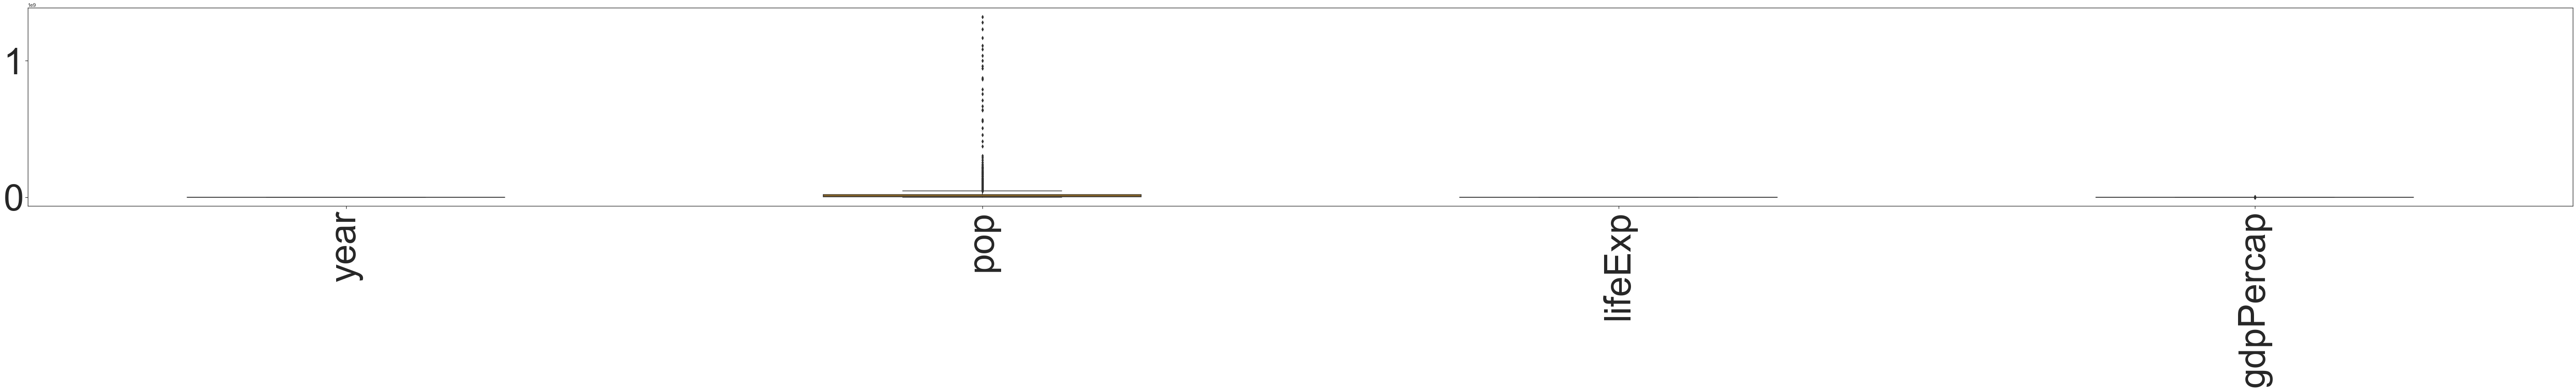

In [94]:
import seaborn as sns
f, ax = plt.subplots(figsize=(100, 8))
bp = sns.boxplot(data=data, width=0.5, palette="colorblind")
plt.setp(bp.get_xticklabels(), rotation=90)
bp.tick_params(labelsize=80)

Boxplot Escalado:

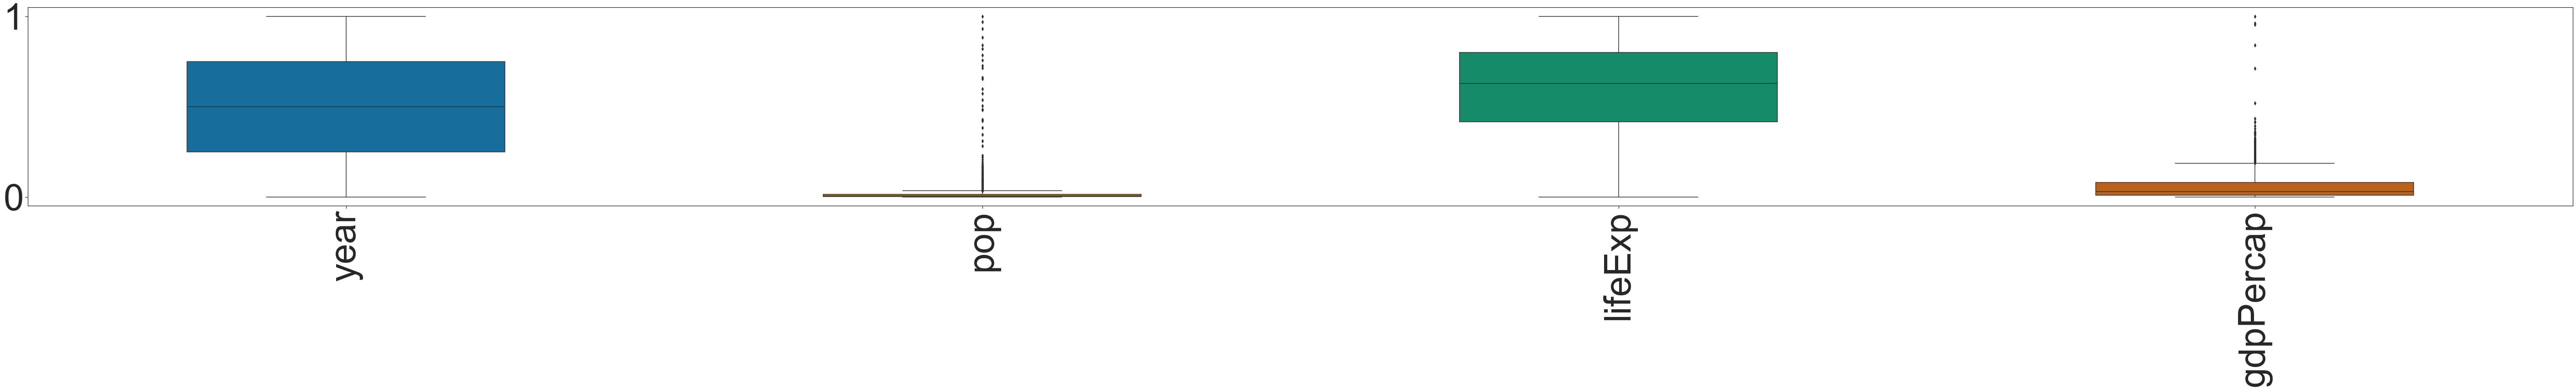

In [93]:
import seaborn as sns
f, ax = plt.subplots(figsize=(100, 8))
bp = sns.boxplot(data=scaled_df, width=0.5, palette="colorblind")
plt.setp(bp.get_xticklabels(), rotation=90)
bp.tick_params(labelsize=80)

Boxplot sem outliers e Escalado:

In [119]:
from numpy import percentile

columns = ['year', 'pop', 'lifeExp','gdpPercap']
df = pd.DataFrame(data[columns], columns=columns)

def removeOutlier(df, col):
    quartis = percentile(df[col], [25, 75])
    d = quartis[1] - quartis[0]
    media = data[col].mean()
    LS = media + 1.5 * d
    LI = media - 1.5 * d

    return df[~((df[col] < LI) | (df[col] > LS))]

df = removeOutlier(df, 'pop')
df = removeOutlier(df, 'lifeExp')
df = removeOutlier(df, 'gdpPercap')

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

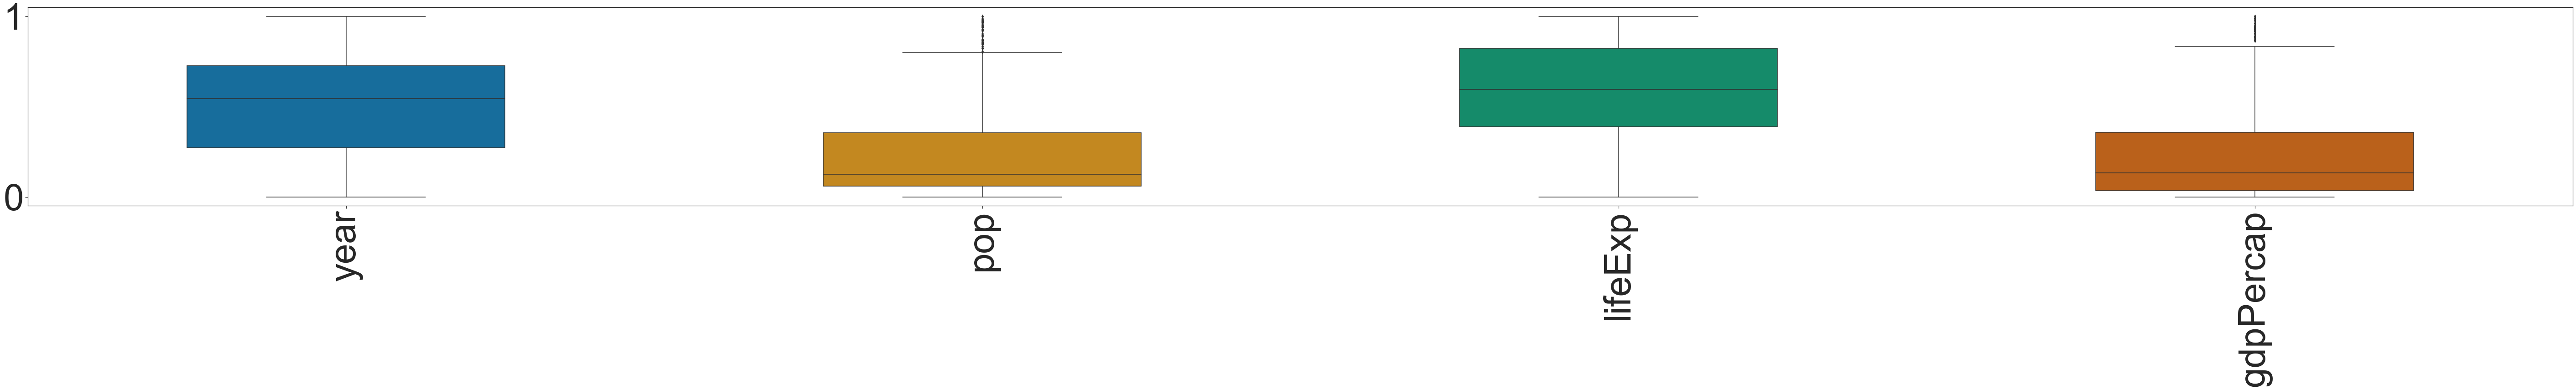

In [121]:
import seaborn as sns
f, ax = plt.subplots(figsize=(100, 8))
bp = sns.boxplot(data=scaled_df, width=0.5, palette="colorblind")
plt.setp(bp.get_xticklabels(), rotation=90)
bp.tick_params(labelsize=80)

### Comparando Ternário

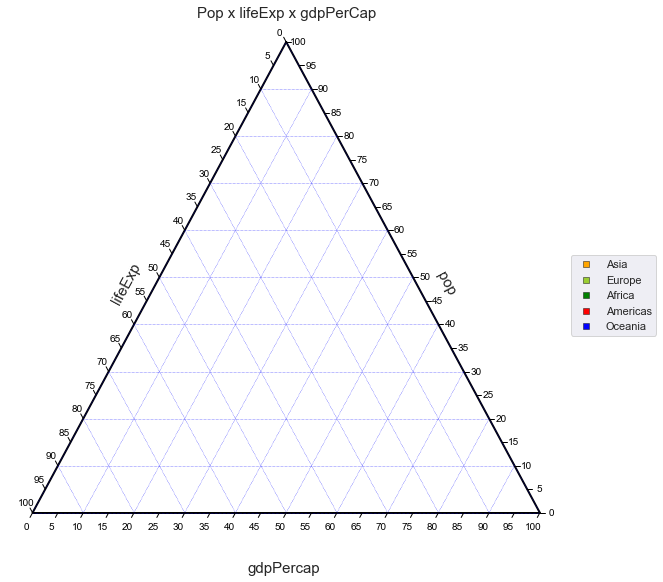

In [201]:
df = data[data.year == 2007]

label_pre = data["continent"].unique().tolist()

points = []
for label in label_pre:
    mask = df['continent'] == label
    pos = np.flatnonzero(mask)
    dataf = df.iloc[pos]
    endmembers = ['gdpPercap','pop','lifeExp']
    points_ = dataf[endmembers].values
    points.append(points_)

colors = ['orange', 'yellowgreen', 'green','red', 'blue']
plot_ternario("Pop x lifeExp x gdpPerCap",label_pre,points,colors,endmembers)

Ternário Escalado

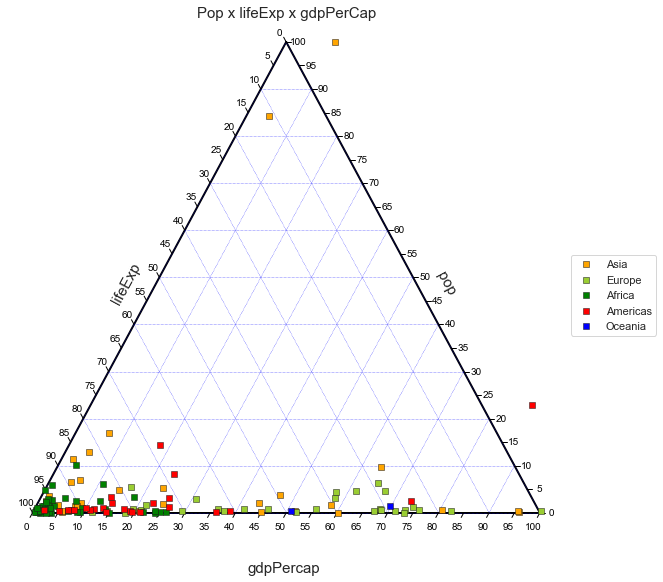

In [147]:
from numpy import percentile

columns = ['year', 'pop', 'lifeExp','gdpPercap']
df2 = data[data.year == 2007]
df = pd.DataFrame(df2, columns=df2.columns)

# x_scaled = (x-min(x)) / (max(x)–min(x))
scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaled_df = scaler.fit_transform(df[columns])
scaled_df = pd.DataFrame(scaled_df, columns=columns, index = df.index)
scaled_df["continent"] = df["continent"]

label_pre = scaled_df["continent"].unique().tolist()

points = []
for label in label_pre:
    mask = scaled_df['continent'] == label
    pos = np.flatnonzero(mask)
    dataf = scaled_df.iloc[pos]
    endmembers = ['gdpPercap','pop','lifeExp']
    points_ = dataf[endmembers].values
    points.append(points_)

colors = ['orange', 'yellowgreen', 'green','red', 'blue']
plot_ternario("Pop x lifeExp x gdpPerCap",label_pre,points,colors,endmembers)

Ternário sem outliers e Escalado

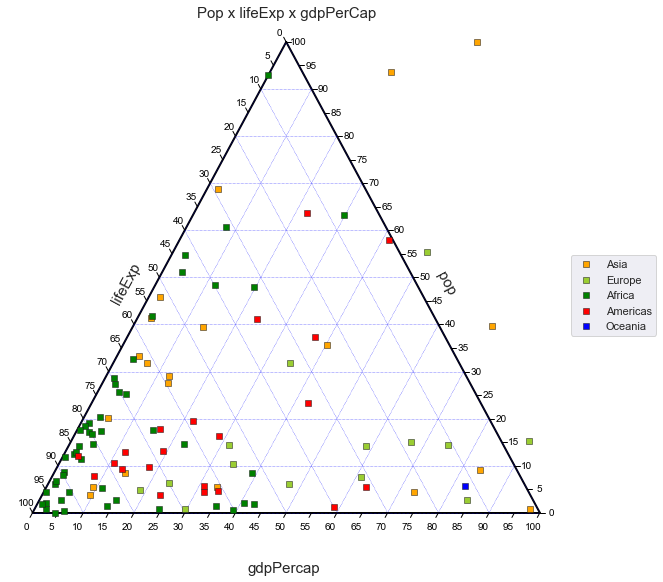

In [200]:
from numpy import percentile

columns = ['year', 'pop', 'lifeExp','gdpPercap']
df2 = data[data.year == 2007]
df = pd.DataFrame(df2, columns=df2.columns)

def removeOutlier(df, col):
    quartis = percentile(df[col], [25, 75])
    d = quartis[1] - quartis[0]
    media = data[col].mean()
    LS = media + 1.5 * d
    LI = media - 1.5 * d

    return df[~((df[col] < LI) | (df[col] > LS))]

df = removeOutlier(df, 'pop')
df = removeOutlier(df, 'lifeExp')
df = removeOutlier(df, 'gdpPercap')


# x_scaled = (x-min(x)) / (max(x)–min(x))
scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaled_df = scaler.fit_transform(df[columns])
scaled_df = pd.DataFrame(scaled_df, columns=columns, index = df.index)
scaled_df["continent"] = df["continent"]

label_pre = scaled_df["continent"].unique().tolist()

points = []
for label in label_pre:
    mask = scaled_df['continent'] == label
    pos = np.flatnonzero(mask)
    dataf = scaled_df.iloc[pos]
    endmembers = ['gdpPercap','pop','lifeExp']
    points_ = dataf[endmembers].values
    points.append(points_)

colors = ['orange', 'yellowgreen', 'green','red', 'blue']
plot_ternario("Pop x lifeExp x gdpPerCap",label_pre,points,colors,endmembers)

# Realizando a Análise Exploratória

In [202]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
data = pd.read_csv("wine.csv")

In [153]:
data.describe().T

count        mean         std     min       25%  \
Class                         178.0    1.938202    0.775035    1.00    1.0000   
Alcohol                       178.0   13.000618    0.811827   11.03   12.3625   
Malic acid                    178.0    2.336348    1.117146    0.74    1.6025   
Ash                           178.0    2.366517    0.274344    1.36    2.2100   
Alcalinity of ash             178.0   19.494944    3.339564   10.60   17.2000   
Magnesium                     178.0   99.741573   14.282484   70.00   88.0000   
Total phenols                 178.0    2.295112    0.625851    0.98    1.7425   
Flavanoids                    178.0    2.029270    0.998859    0.34    1.2050   
Nonflavanoid phenols          178.0    0.361854    0.124453    0.13    0.2700   
Proanthocyanins               178.0    1.590899    0.572359    0.41    1.2500   
Color intensity               178.0    5.058090    2.318286    1.28    3.2200   
Hue                           178.0    0.957449    0.228572    0.48    0.7825   
OD280/OD315 of diluted wines  178.0    2.611685    0.709990    1.27    1.9375   
Proline                       178.0  746.893258  314.907474  278.00  500.5000   

                                  50%       75%      max  
Class                           2.000    3.0000     3.00  
Alcohol                        13.050   13.6775    14.83  
Malic acid                      1.865    3.0825     5.80  
Ash                             2.360    2.5575     3.23  
Alcalinity of ash              19.500   21.5000    30.00  
Magnesium                      98.000  107.0000   162.00  
Total phenols                   2.355    2.8000     3.88  
Flavanoids                      2.135    2.8750     5.08  
Nonflavanoid phenols            0.340    0.4375     0.66  
Proanthocyanins                 1.555    1.9500     3.58  
Color intensity                 4.690    6.2000    13.00  
Hue                             0.965    1.1200     1.71  
OD280/OD315 of diluted wines    2.780    3.1700     4.00  
Proline                       673.500  985.0000  1680.00

### Analisando Boxplot

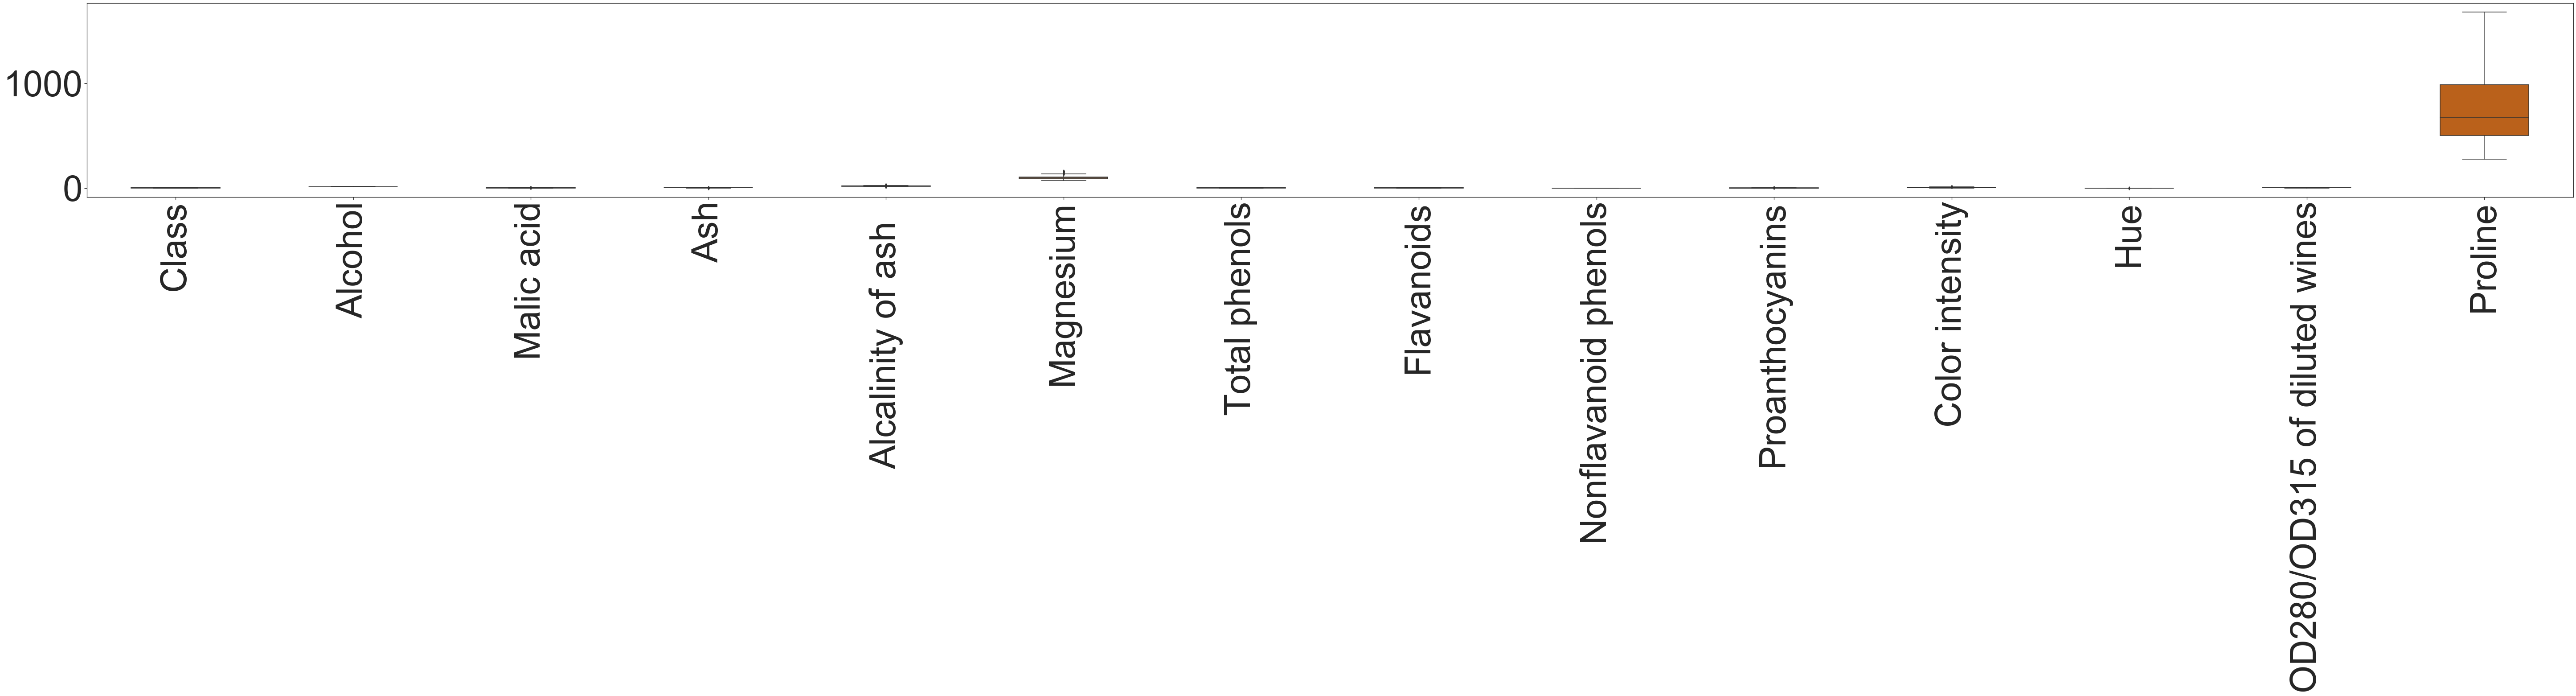

In [154]:
df = data

f, ax = plt.subplots(figsize=(100, 8))
bp = sns.boxplot(data=df, width=0.5, palette="colorblind")
plt.setp(bp.get_xticklabels(), rotation=90)
bp.tick_params(labelsize=80)

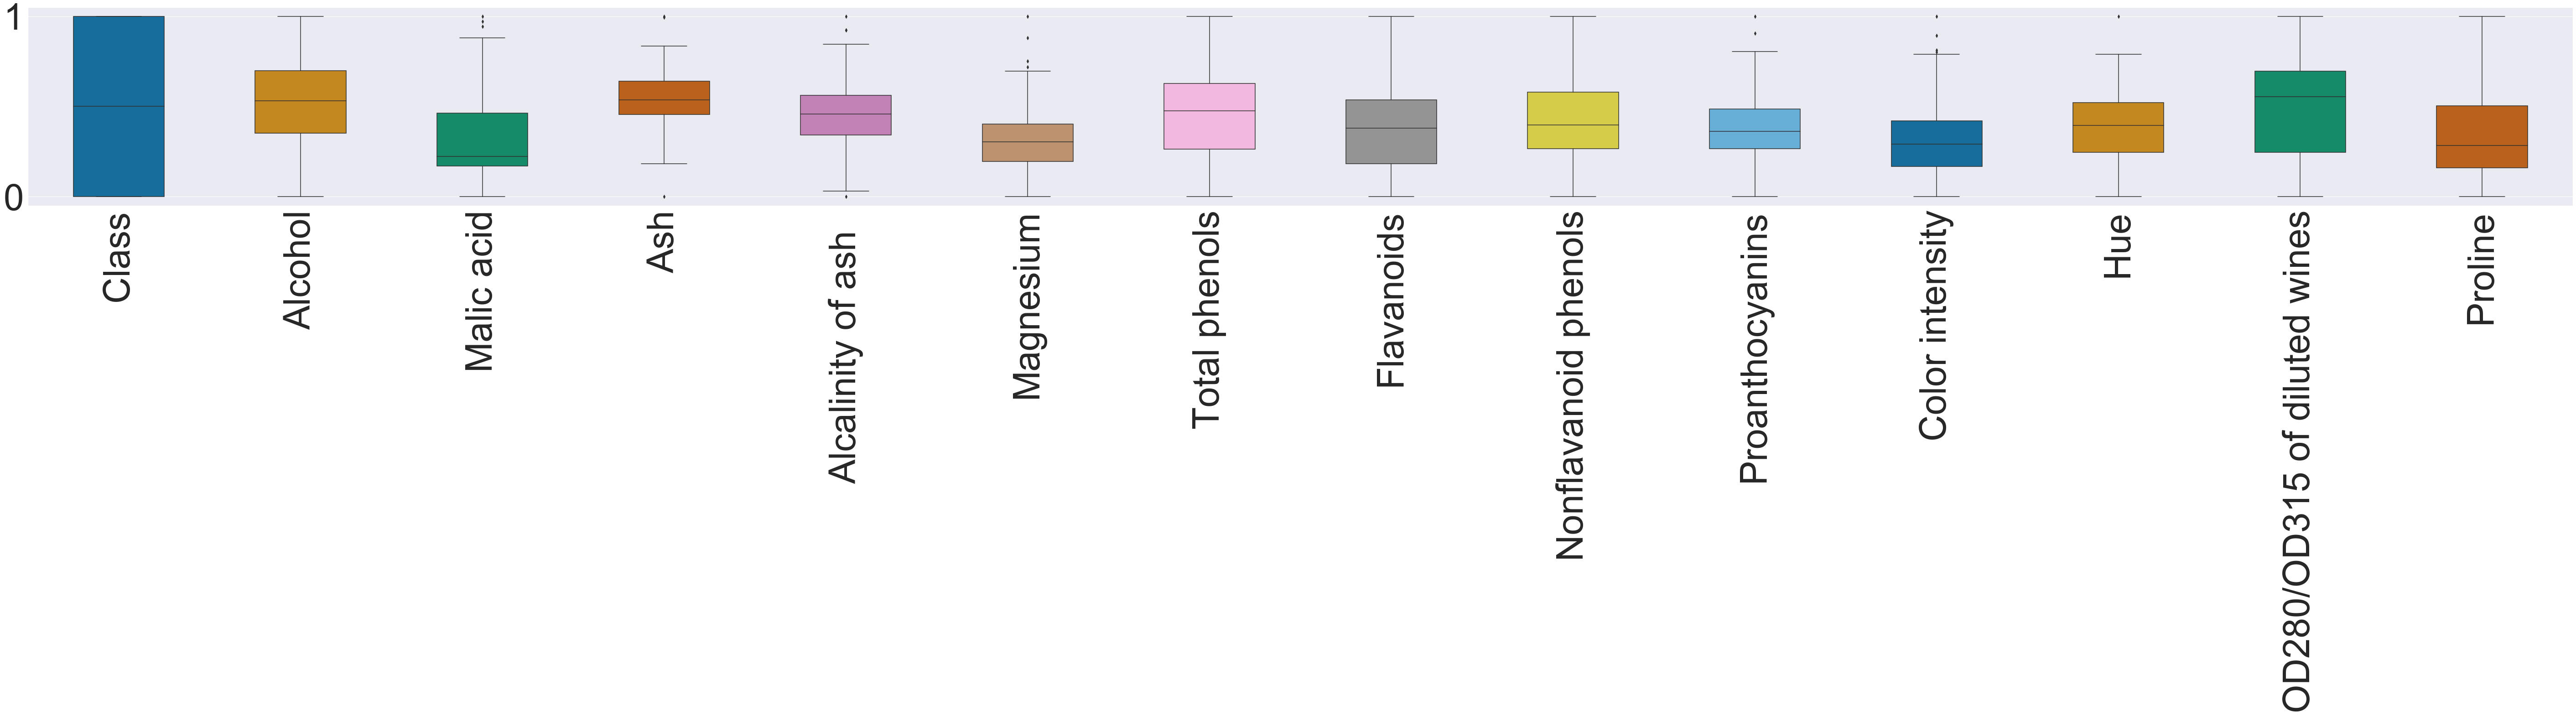

In [187]:
df = pd.DataFrame(data, columns=data.columns)

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

f, ax = plt.subplots(figsize=(100, 8))
bp = sns.boxplot(data=scaled_df, width=0.5, palette="colorblind")
plt.setp(bp.get_xticklabels(), rotation=90)
bp.tick_params(labelsize=80)

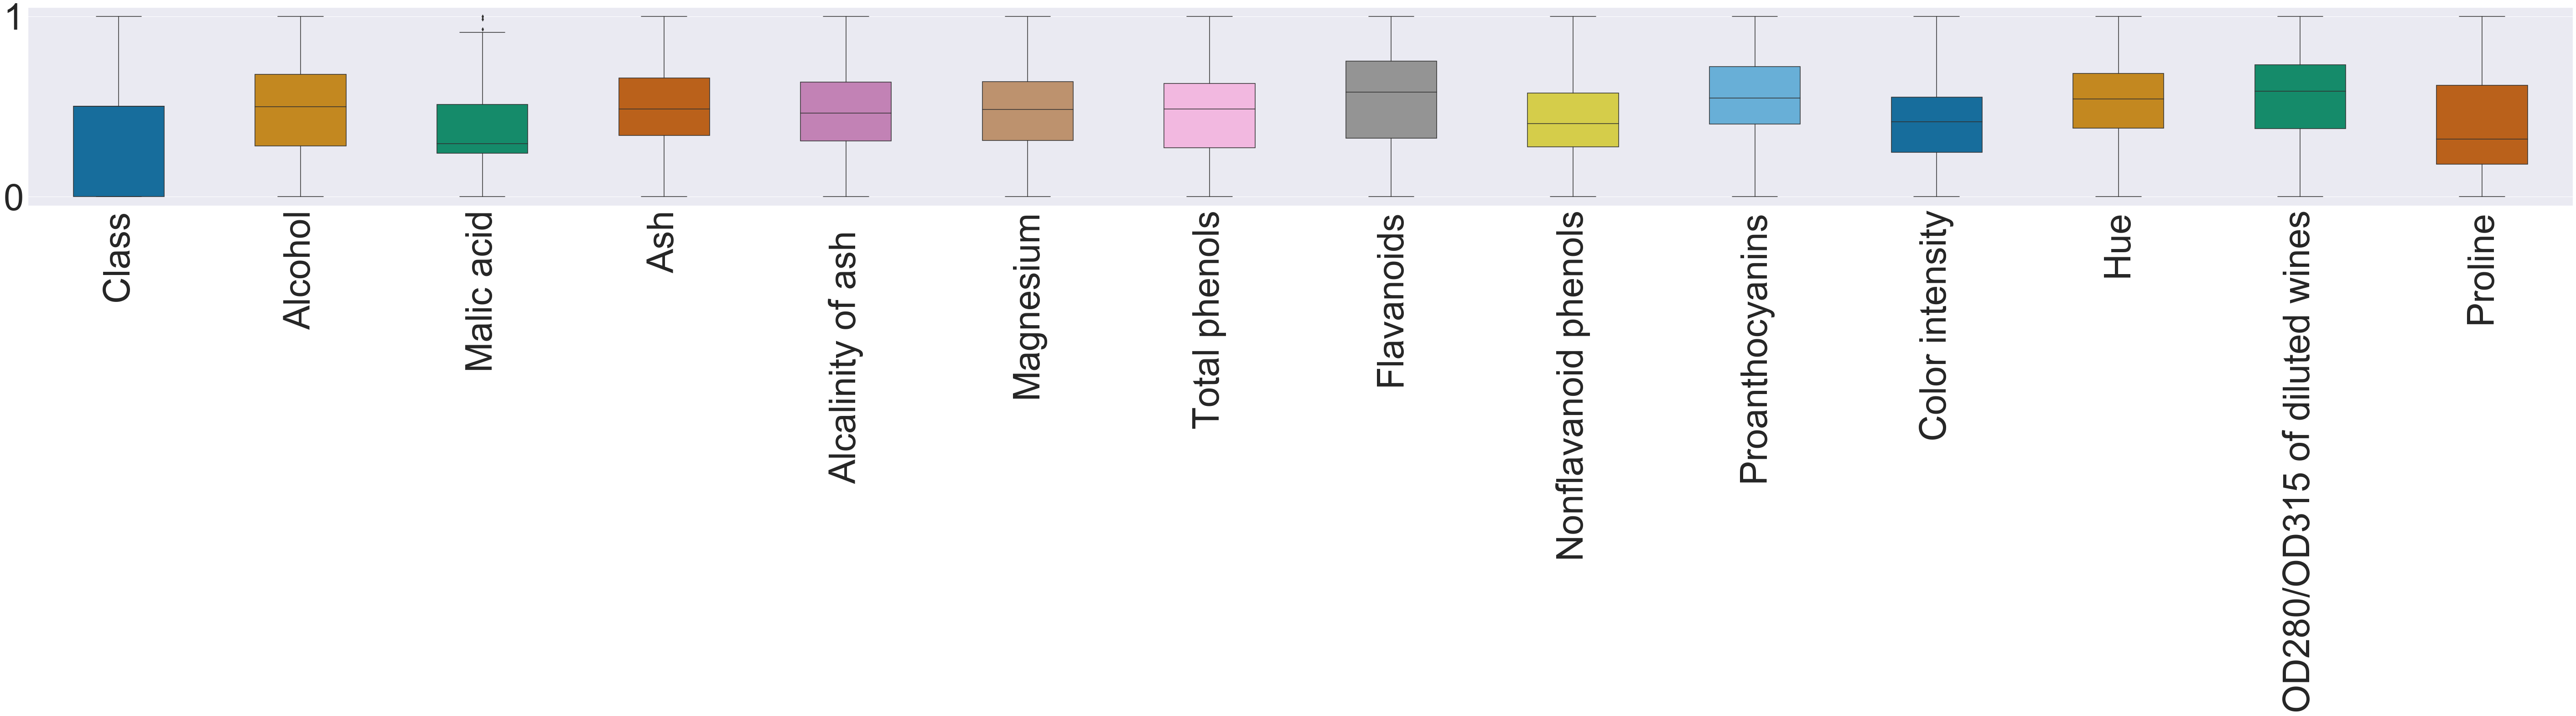

In [204]:
from numpy import percentile

df = pd.DataFrame(data, columns=data.columns)

def removeOutlier(df, col):
    quartis = percentile(df[col], [25, 75])
    d = quartis[1] - quartis[0]
    media = data[col].mean()
    LS = media + 1.5 * d
    LI = media - 1.5 * d

    return df[~((df[col] < LI) | (df[col] > LS))]

for c in data.columns:
    if c != 'Class':
        df = removeOutlier(df, c)

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

f, ax = plt.subplots(figsize=(100, 8))
bp = sns.boxplot(data=scaled_df, width=0.5, palette="colorblind")
plt.setp(bp.get_xticklabels(), rotation=90)
bp.tick_params(labelsize=80)

### Matriz de Correlação

In [169]:
df = data.apply(lambda row: pd.Series({'Type': 'Type ' + str(row['Class'])}), axis=1)
df = pd.merge(df, data, left_index=True, right_index=True)

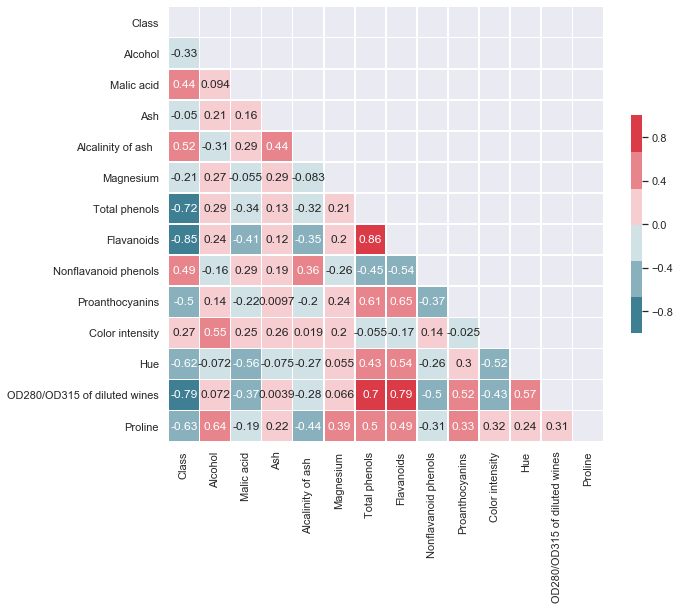

In [170]:
corr = df.corr()

sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(10, 8))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

cmap = sns.diverging_palette(220, 10)

sns.heatmap(corr, mask=mask, annot=True, cmap=cmap,
            vmax=1, vmin=-1, center=0, square=True, 
            linewidth=.5,cbar_kws={"shrink":.5})

### Pairplot

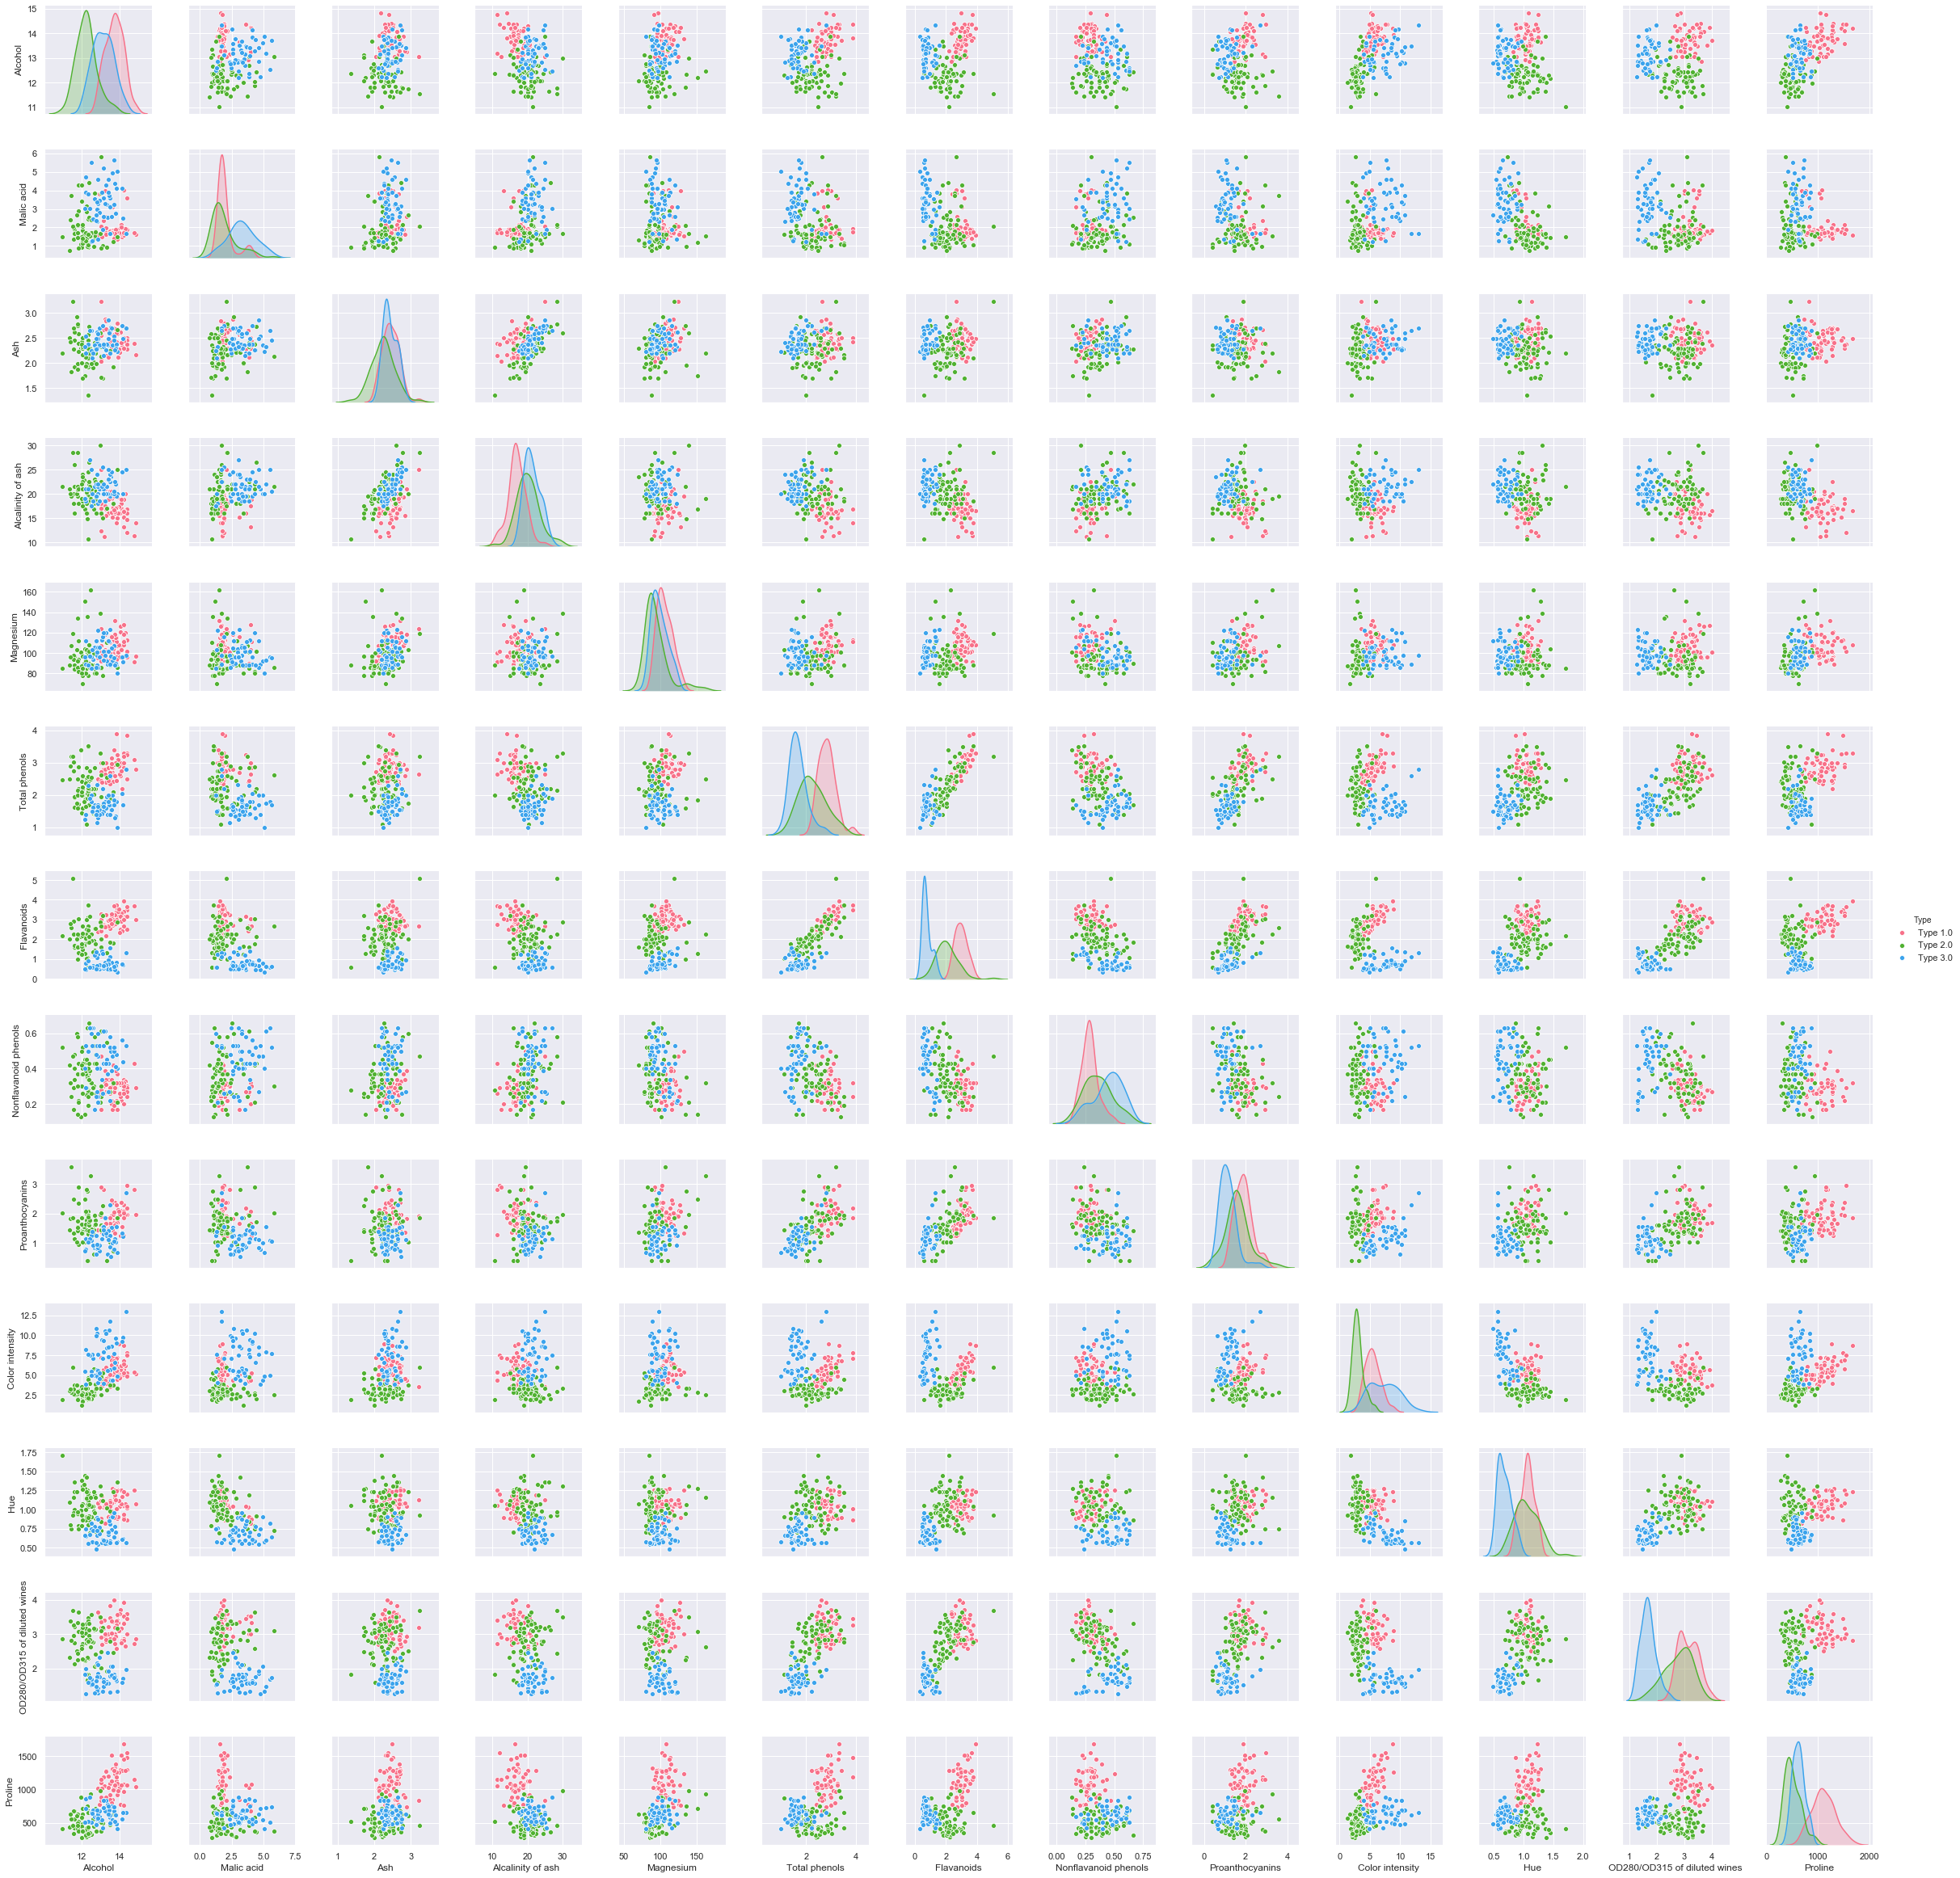

In [171]:
df = df.drop(['Class'], axis=1)
sns.pairplot(df, hue="Type", palette="husl")

### Comparando Ternário

Ternário Original

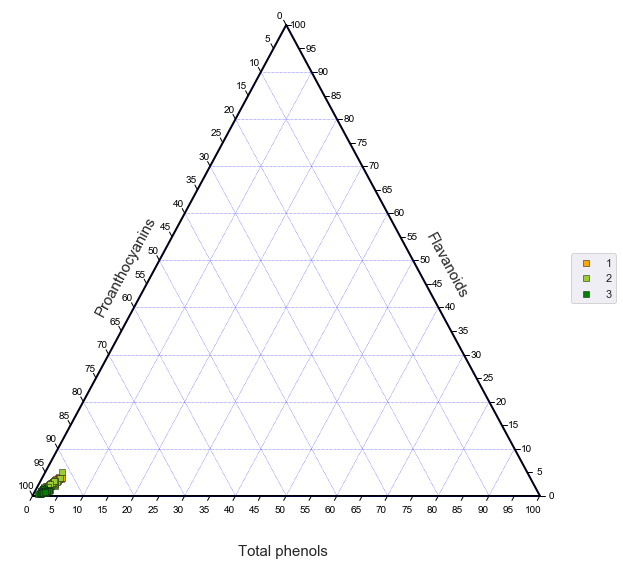

In [206]:
datafl = data

label_pre = datafl["Class"].unique().tolist()

points = []
for label in label_pre:
    mask = datafl['Class'] == label
    pos = np.flatnonzero(mask)
    df = datafl.iloc[pos]
    endmembers = ['Total phenols','Flavanoids', 'Proanthocyanins']
    points_ = df[endmembers].values
    points.append(points_)

colors = ['orange', 'yellowgreen', 'green','orange', 'yellowgreen', 'green','orange', 'yellowgreen', 'green']
plot_ternario("",label_pre,points,colors,endmembers)

Ternário Escalado

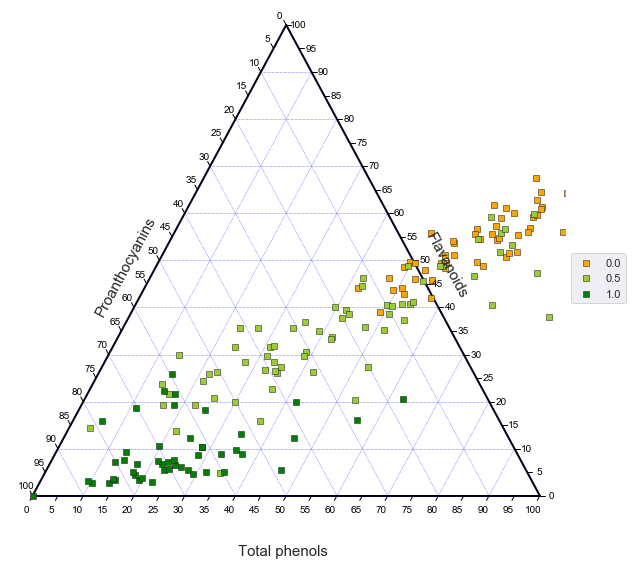

In [196]:
df = pd.DataFrame(data, columns=data.columns)

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

datafl = scaled_df
datafl['Total phenols'] = datafl['Total phenols'] * 100
datafl['Flavanoids'] = datafl['Flavanoids'] * 100
datafl['Proanthocyanins'] = datafl['Proanthocyanins'] * 100

label_pre = datafl["Class"].unique().tolist()

points = []
for label in label_pre:
    mask = datafl['Class'] == label
    pos = np.flatnonzero(mask)
    df = datafl.iloc[pos]
    endmembers = ['Total phenols','Flavanoids', 'Proanthocyanins']
    points_ = df[endmembers].values
    points.append(points_)

colors = ['orange', 'yellowgreen', 'green','orange', 'yellowgreen', 'green','orange', 'yellowgreen', 'green']
plot_ternario("",label_pre,points,colors,endmembers)

Ternário sem outliers e escalado

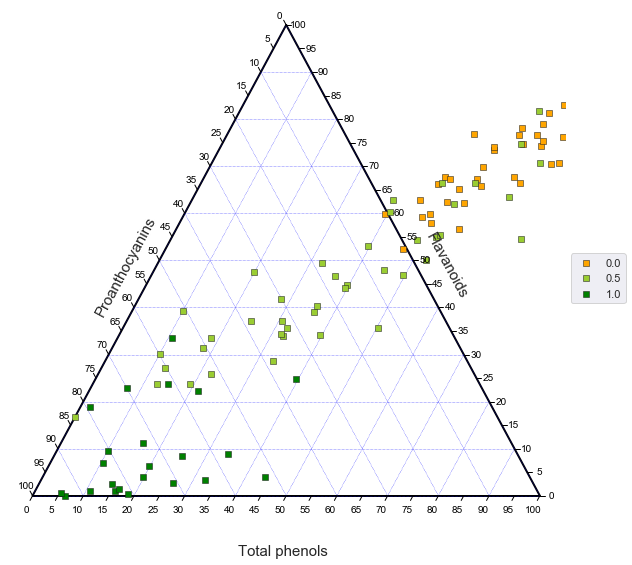

In [205]:
df = pd.DataFrame(data, columns=data.columns)

def removeOutlier(df, col):
    quartis = percentile(df[col], [25, 75])
    d = quartis[1] - quartis[0]
    media = data[col].mean()
    LS = media + 1.5 * d
    LI = media - 1.5 * d

    return df[~((df[col] < LI) | (df[col] > LS))]

for c in data.columns:
    if c != 'Class':
        df = removeOutlier(df, c)

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

datafl = scaled_df
datafl['Total phenols'] = datafl['Total phenols'] * 100
datafl['Flavanoids'] = datafl['Flavanoids'] * 100
datafl['Proanthocyanins'] = datafl['Proanthocyanins'] * 100

label_pre = datafl["Class"].unique().tolist()

points = []
for label in label_pre:
    mask = datafl['Class'] == label
    pos = np.flatnonzero(mask)
    df = datafl.iloc[pos]
    endmembers = ['Total phenols','Flavanoids', 'Proanthocyanins']
    points_ = df[endmembers].values
    points.append(points_)

colors = ['orange', 'yellowgreen', 'green','orange', 'yellowgreen', 'green','orange', 'yellowgreen', 'green']
plot_ternario("",label_pre,points,colors,endmembers)